# Preliminaries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [3]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)

# Parameters
m = 1
Nk = 201
kxs =np.linspace(-np.pi, np.pi, Nk)
kys =np.linspace(-np.pi, np.pi, Nk)

# Computation of Chern number and Berry curvature using FHS method

Ref. Fukui et al (2005)

In [4]:
# Compute eigenvectors on grid
eigvecs = np.zeros((Nk, Nk, 2), dtype=complex)
for i in range(Nk):
    for j in range(Nk):
        kx, ky = kxs[i], kys[j]
        Hk = np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (m - np.cos(kx) - np.cos(ky)) * sigma_z
        _, evecs = np.linalg.eigh(Hk)
        eigvecs[i, j, :] = evecs[:, 0]  # Lower band

# Compute Berry curvature F for the m specified above
F = np.zeros((Nk - 1, Nk - 1))
for i in range(Nk - 1):
    for j in range(Nk - 1):
        u = eigvecs[i, j]
        u_x = eigvecs[i + 1, j]
        u_y = eigvecs[i, j + 1]
        u_xy = eigvecs[i + 1, j + 1]

        Ux = np.vdot(u, u_x)
        Uy = np.vdot(u, u_y)
        Uxy = np.vdot(u_x, u_xy)
        Uyx = np.vdot(u_y, u_xy)

        # Normalize link variables to unit magnitude (pure phase)
        Ux /= np.abs(Ux)
        Uy /= np.abs(Uy)
        Uxy /= np.abs(Uxy)
        Uyx /= np.abs(Uyx)

        F[i, j] = np.angle(Ux * Uxy * np.conj(Uyx) * np.conj(Uy))

* Chern number

In [5]:
# Compute and print Chern number for individual value of m
chern = np.sum(F) / (2 * np.pi)
print ("Chern number for m =", m, "is", chern)

Chern number for m = 1 is 1.0


* Wilson loop

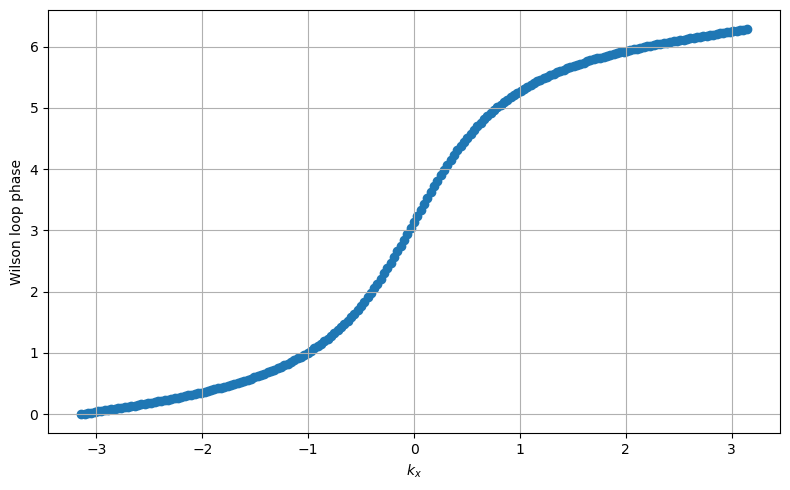

In [6]:
# Chern insulator Hamiltonian
def hamiltonian(kx, ky, m):
    H = np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (m - np.cos(kx) - np.cos(ky)) * sigma_z
    return H

# Wilson loop operator
def wilson_loop(kx_fixed, m):
    overlaps = []
    for i in range(Nk):
        ky1 = kys[i]
        ky2 = kys[(i+1) % Nk]
        H1 = hamiltonian(kx_fixed, ky1, m)
        H2 = hamiltonian(kx_fixed, ky2, m)
        _, v1 = np.linalg.eigh(H1)
        _, v2 = np.linalg.eigh(H2)

        u1 = v1[:, 0] #lowest band only (0) because we're interested in the occupied band
        u2 = v2[:, 0]
        overlap = np.vdot(u1, u2)
        overlaps.append(overlap)
    
    W = np.prod(overlaps) 
    
    return np.angle(W)

# Wilson loop phases
kxs =np.linspace(-np.pi, np.pi, Nk)
phases = [wilson_loop(kx,m) for kx in kxs]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(kxs, np.unwrap(phases))
plt.xlabel("$k_x$")
plt.ylabel("Wilson loop phase")
plt.grid(True)
plt.tight_layout()
plt.show()


* Berry curvature

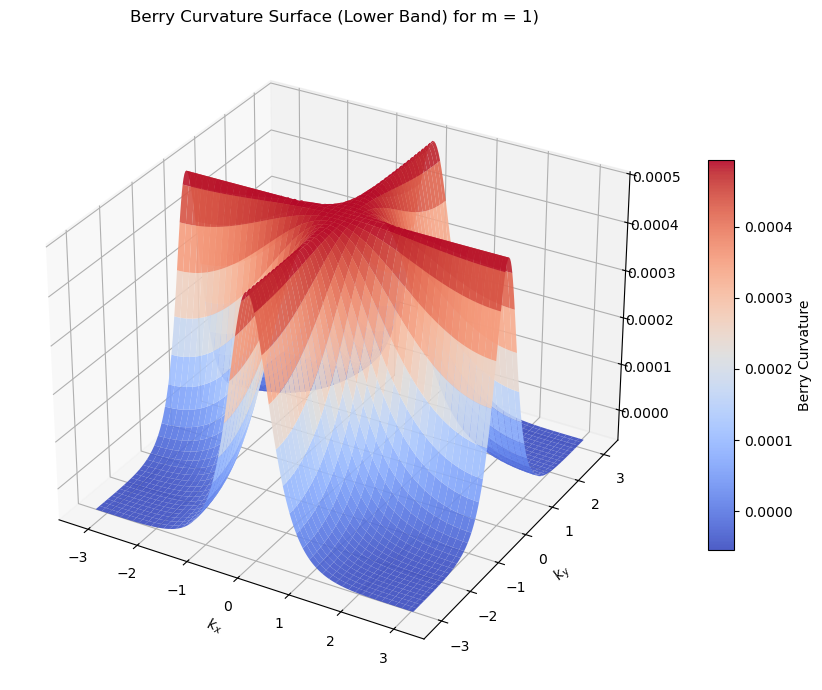

In [7]:
KX_plot, KY_plot = np.meshgrid(kxs[:-1], kys[:-1])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(KX_plot, KY_plot, F.T, cmap='coolwarm', edgecolor='none', alpha=0.9)

ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_title('Berry Curvature Surface (Lower Band) for m = {})'.format(m))

fig.colorbar(surf, ax=ax, shrink=0.6, aspect=15, label='Berry Curvature')
plt.tight_layout()
plt.show()

# Chern number vs m visualization 

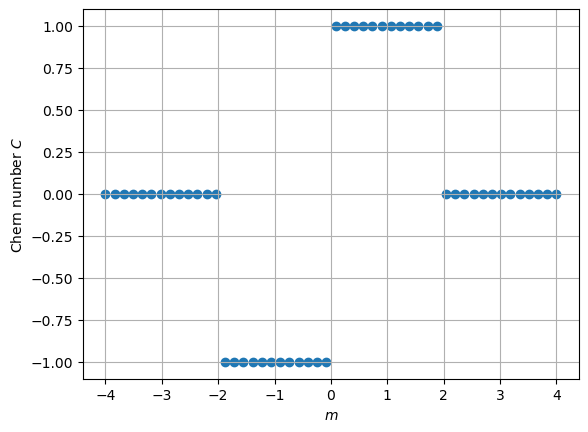

In [14]:

ms = np.linspace(-4, 4, 50)
chern_n = []
for m in ms:
    # Compute eigenvectors on grid
    eigvecs = np.zeros((Nk, Nk, 2), dtype=complex)
    for i in range(Nk):
        for j in range(Nk):
            kx, ky = kxs[i], kys[j]
            Hk = np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (m - np.cos(kx) - np.cos(ky)) * sigma_z
            _, evecs = np.linalg.eigh(Hk)
            eigvecs[i, j, :] = evecs[:, 0]  # Lower band

    # Compute Berry curvature F for m
    F = np.zeros((Nk - 1, Nk - 1))
    for i in range(Nk - 1):
        for j in range(Nk - 1):
            u = eigvecs[i, j]
            u_x = eigvecs[i + 1, j]
            u_y = eigvecs[i, j + 1]
            u_xy = eigvecs[i + 1, j + 1]

            Ux = np.vdot(u, u_x)
            Uy = np.vdot(u, u_y)
            Uxy = np.vdot(u_x, u_xy)
            Uyx = np.vdot(u_y, u_xy)

            # Normalize link variables to unit magnitude (pure phase)
            Ux /= np.abs(Ux)
            Uy /= np.abs(Uy)
            Uxy /= np.abs(Uxy)
            Uyx /= np.abs(Uyx)

            F[i, j] = np.angle(Ux * Uxy * np.conj(Uyx) * np.conj(Uy))

    # Compute Chern number
    chern = np.sum(F) / (2 * np.pi)
    chern_n.append(chern)

# Plot
plt.scatter (ms, chern_n)
plt.xlabel ('$m$')
plt.ylabel ('Chern number $C$')
plt.grid (True)
plt.show ()